In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

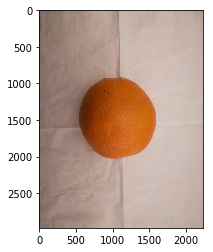

In [45]:
#read image
img = cv2.imread('../images_to_classify/laranja1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

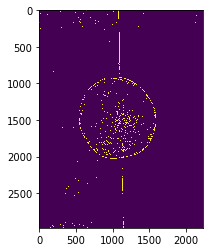

In [47]:
#converting image to graysclae and find threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.adaptiveThreshold(gray, 80, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh)

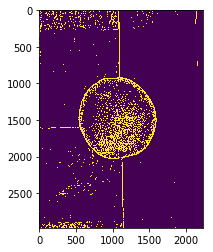

In [48]:
#enhance contours by dilating them
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(thresh, kernel)
plt.imshow(dilated)

In [49]:
#get edged image contours
_, cnts, _  = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

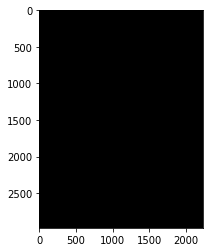

In [50]:
#create a mask (black image) and draw contours of the fruit on the mask
mask = np.zeros_like(img)
plt.imshow(mask)

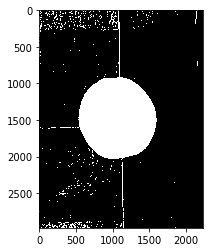

In [51]:
#insert fruit area of original image onto a new image with black background
cv2.fillPoly(mask, pts =cnts, color=(255,255,255))
plt.imshow(mask)

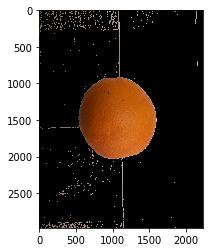

In [53]:
#put back all 3 color dimensions on the mask
img2 = img.copy()
mask[:,:,1] = mask[:,:,0]
mask[:,:,2] = mask[:,:,0]
img2[mask!=255] = 0
plt.imshow(img2)

In [54]:
#get all the rgb values for the mask
r = img2[:,:,0]
g = img2[:,:,1]
b = img2[:,:,2]

#filter all the rgb values for the mask to eliminate the ones that are 0 (black)
r = r[r!=0]
g = g[g!=0]
b = b[b!=0]

[int(r.mean()), int(g.mean()), int(b.mean())]

[170, 90, 37]